In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('transactions_dataset.csv')

print(df.head(10).to_string(index=False))

Transaction_ID  Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  Frequency_of_Transactions  Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age Gender  Income Account_Type
           TX0         1024.835708                   3                  997.234714                         12                           29      Friday       06:00   36   Male 1436074      Savings
           TX1         1013.952065                   4                 1020.210306                          7                           22      Friday       01:00   41 Female  627069      Savings
           TX2          970.956093                   1                  989.496604                          5                           12     Tuesday       21:00   61   Male  786232      Savings
           TX3         1040.822254                   2                  969.522480                         16                           28      Sunday       14:00   61   Male  619030      Savings
           TX4      

In [5]:
df.columns

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type'],
      dtype='object')

1.  Transaction_ID: Unique identifier for each transaction.
2.  Transaction_Amount: The monetary value of the transaction.
3.  Transaction_Volume: The quantity or number of items/actions involved in the transaction.
4.  Average_Transaction_Amount: The historical average transaction amount for the account.
5.  Frequency_of_Transactions: How often transactions are typically performed by the account.
6.  Time_Since_Last_Transaction: Time elapsed since the last transaction.
7.  Day_of_Week: The day of the week when the transaction occurred.
8.  Time_of_Day: The time of day when the transaction occurred.
9.  Age: Age of the account holder.
10. Gender: Gender of the account holder.
11. Income: Income of the account holder.
12. Account_Type: Type of account (e.g., personal, business).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [7]:
df.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


In [8]:
df.isnull().sum()

,0
Transaction_ID,0
Transaction_Amount,0
Transaction_Volume,0
Average_Transaction_Amount,0
Frequency_of_Transactions,0
Time_Since_Last_Transaction,0
Day_of_Week,0
Time_of_Day,0
Age,0
Gender,0


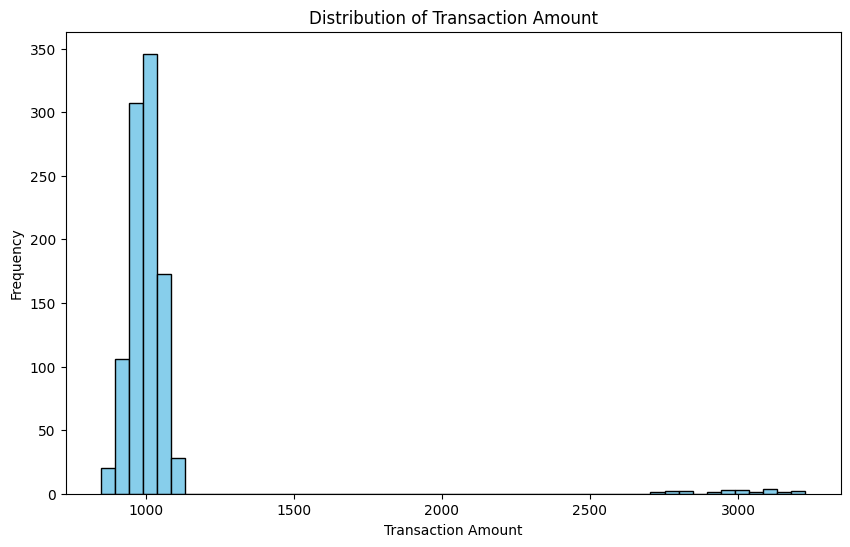

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Transaction_Amount'], bins = 50, color='skyblue', edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()

The histogram shows two groups:

1. A primary peak around the 1000 mark, is the majority of transaction amounts lie.

2. A secondary, a small group of transactions around the 3000 mark.

3. highest frequency of transactions occurs between 950 and 1100,it shows that most users have transactions in a narrow range, indicating a standard pricing or billing model.

4. there is a noticeable gap between the main cluster (900-1200) and outliers (above 2700).

5. high value transactions (around 3000) are very infrequent, suggesting they may be premium transactions, fraudulent or suspicious activities need further investigation or legitimate but rare business operations.



---



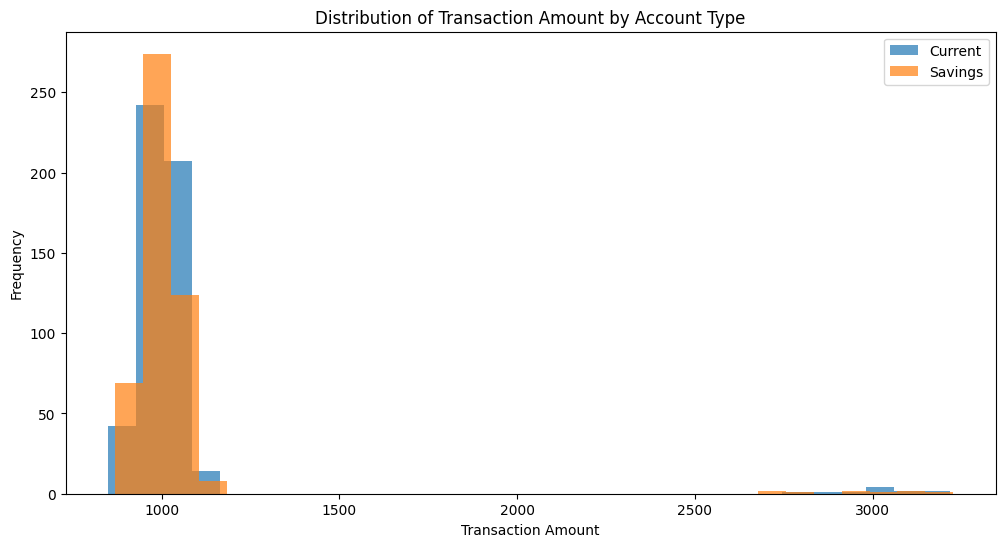

In [10]:
account_type_transactions = df.groupby('Account_Type')['Transaction_Amount']

plt.figure(figsize=(12, 6))

for account_type, transactions in account_type_transactions:
    plt.hist(transactions, bins=30, alpha=0.7, label=account_type)

plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount by Account Type')
plt.legend()
plt.show()

Both account types (Savings,Current) follow similar Distribution Patterns:

1. transaction amounts for both account types are highly clustered between 900 and 1100, it shows a standard transaction behavior, may due to fixed charges or can be regular payments.

2. savings account has more transactions in the lower range, orange bars (Savings) show little higher frequencies in 900-1000 range compared to Current accounts, indicating that users having savings account tend to do transactions in small amounts frequently.

3. current account has more transactions Above 1050, blue bars (Current) are more in 1050-1150 range, showing slightly high value transactions, may be business related transactions.

4. outliers still present in both account types, very small number of transactions for both types exist in the 3000+ range, showing that rare high value transactions are not limited to one account type.




---



Age
18     996.381633
19    1000.935435
20    1107.299523
21    1000.436424
22    1007.187911
23     996.574490
24    1068.980273
25    1107.066897
26    1006.965183
27    1127.922688
28     996.537145
29    1142.712980
30    1009.215226
31    1001.457927
32     994.029531
33    1018.160476
34    1078.025054
35     989.441617
36     987.709583
37    1088.661944
38     994.574617
39     985.368034
40    1075.002553
41     989.648395
42    1001.583469
43     978.592737
44     988.153586
45    1063.029976
46    1013.796718
47    1281.223948
48    1012.491534
49    1008.393397
50    1020.266360
51    1089.007889
52    1005.949434
53     998.298356
54    1005.362677
55    1001.332644
56    1011.147909
57    1156.036150
58    1092.679669
59     984.445384
60    1085.239830
61     987.233132
62    1213.209855
63    1097.702627
64     996.902231
Name: Transaction_Amount, dtype: float64




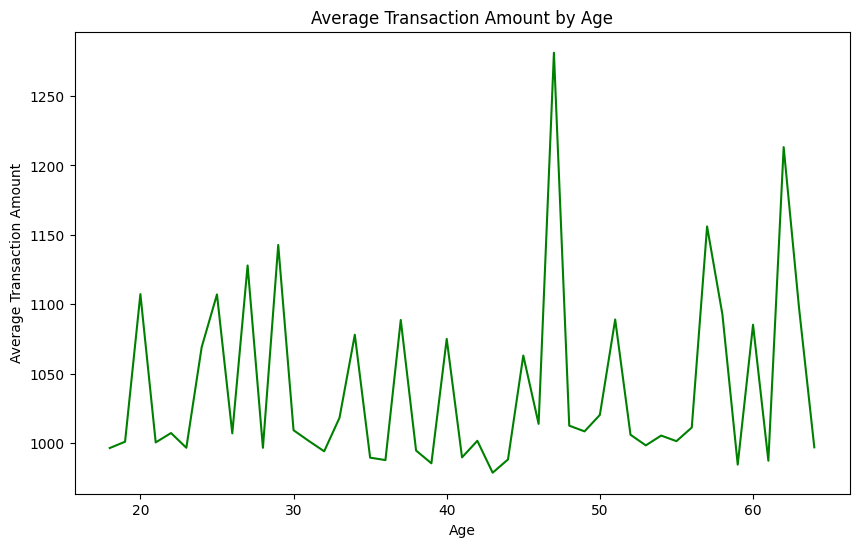

In [11]:
average_transaction_by_age = df.groupby('Age')['Transaction_Amount'].mean()

print(average_transaction_by_age)

print('\n')
plt.figure(figsize=(10, 6))
plt.plot(average_transaction_by_age.index, average_transaction_by_age.values, color = 'green')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Age')
plt.show()

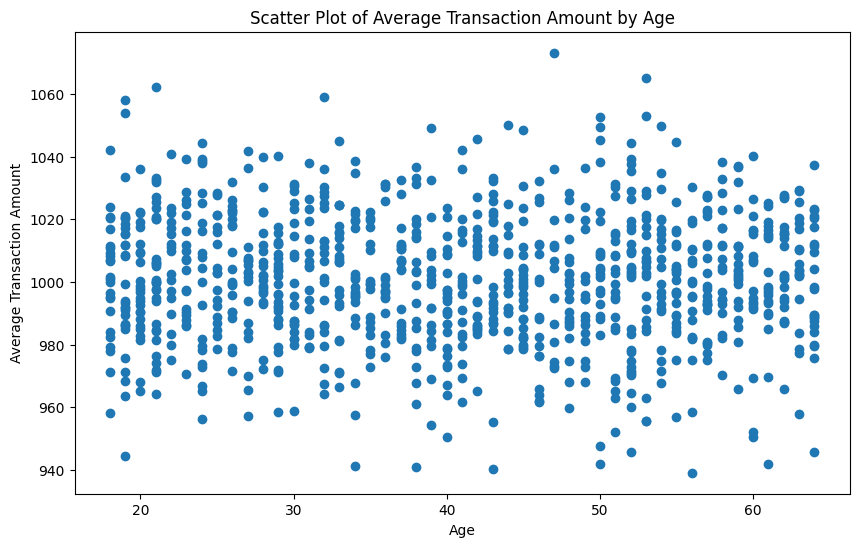

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Average_Transaction_Amount'])
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.title('Scatter Plot of Average Transaction Amount by Age')
plt.show()

The points are widely scattered without any clear upward or downward trend, so there is no major correlation between age and transaction amount.

Age does not seems to be a strong factor in determining average transaction behavior. Most users, regardless of age, transact within a consistent amount range.



---



Day_of_Week
Tuesday      157
Wednesday    148
Thursday     148
Sunday       145
Friday       143
Monday       132
Saturday     127
Name: count, dtype: int64


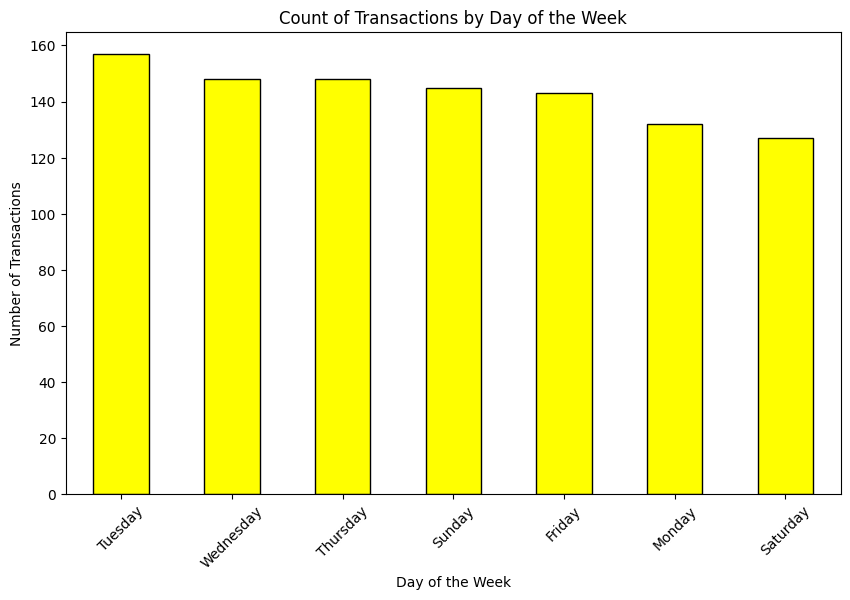

In [13]:
transactions_by_day = df['Day_of_Week'].value_counts()

print(transactions_by_day)

plt.figure(figsize=(10, 6))
transactions_by_day.plot(kind='bar', color='yellow', edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Count of Transactions by Day of the Week')
plt.xticks(rotation=45)
plt.show()

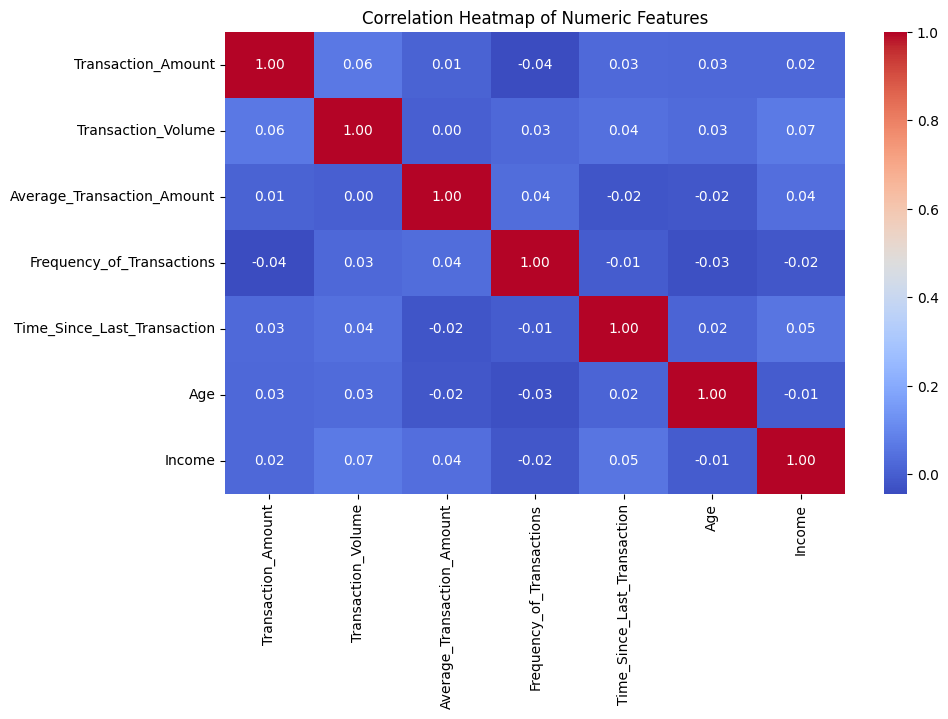

In [28]:
import seaborn as sns


# selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


1. most correlation values are close to 0, indicating almost no linear relationship between the variables.

2. Transaction_Amount and Transaction_Volume have the strongest correlation (0.06), but its still weak.

3. Age and Income are not significantly correlated with any other variables, and also including each other.

4. Self-Correlation (Diagonal = 1.00), each variable is perfectly correlated with itself, as expected.

5. there are no strong linear relationships among the numeric features, this shows that non-linear models or feature engineering may be needed to extract meaningful patterns.



---



In [29]:
df2 = df.copy()

In [30]:
df2

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings
...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,46,Female,424746,Savings
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,58,Female,908278,Current
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,58,Female,1353498,Current
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,58,Female,359072,Savings




---



In [31]:
# Spending Ratio: Transaction_Amount / Income

df2['Spending_Ratio'] = df2['Transaction_Amount'] / df2['Income']

df2['Spending_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

df2

<ipython-input-31-dee9dd5777d3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Spending_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Spending_Ratio
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,0.000714
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,0.001617
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,0.001235
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,0.001681
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,0.001538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,46,Female,424746,Savings,0.002122
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,58,Female,908278,Current,0.001023
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,58,Female,1353498,Current,0.000703
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,58,Female,359072,Savings,0.002599


It standardizes spending behavior across customers with different income levels.
A high spending ratio can be a risky financial behavior or financial stress.


1. customers with Spending_Ratio > 1 are spending more than they earn may lead to potential loan default risk.

2. useful in clustering or customer segmentation.





---



In [32]:
df2['Income_Group'] = pd.qcut(df2['Income'], q=3, labels=['Low', 'Medium', 'High'])

In [33]:
df2

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Spending_Ratio,Income_Group
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,0.000714,High
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,0.001617,Low
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,0.001235,Medium
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,0.001681,Low
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,0.001538,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,46,Female,424746,Savings,0.002122,Low
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,58,Female,908278,Current,0.001023,Medium
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,58,Female,1353498,Current,0.000703,High
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,58,Female,359072,Savings,0.002599,Low


Converts a continuous variable into categorical, useful for:

classification models, group comparisons, stratified analysis and allows you to compare behaviors for different income levels.

1. analyze how transaction frequency or amount varies by income tier.

2. targeted marketing: eg low income group may get cashback offers, whereas high income may get premium cards.



---



In [34]:
from scipy import stats

#Outlier Detection using Z-score and IQR

#   Z-score Method for Transaction_Amount
df2['Zscore_Transaction_Amount'] = stats.zscore(df2['Transaction_Amount'])
df2['Is_Outlier_Z_Transaction'] = df2['Zscore_Transaction_Amount'].abs() > 3

#  IQR Method for Income
Q1 = df2['Income'].quantile(0.25)
Q3 = df2['Income'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2['Is_Outlier_IQR_Income'] = df2['Income'].between(lower_bound, upper_bound)

In [35]:
df2

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Spending_Ratio,Income_Group,Zscore_Transaction_Amount,Is_Outlier_Z_Transaction,Is_Outlier_IQR_Income
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,0.000714,High,-0.046877,False,True
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,0.001617,Low,-0.085276,False,True
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,0.001235,Medium,-0.236970,False,True
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,0.001681,Low,0.009525,False,True
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,0.001538,Low,-0.138814,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,46,Female,424746,Savings,0.002122,Low,-0.483293,False,True
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,58,Female,908278,Current,0.001023,Medium,-0.385128,False,True
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,58,Female,1353498,Current,0.000703,High,-0.307654,False,True
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,58,Female,359072,Savings,0.002599,Low,-0.369853,False,True


Outliers can disturb machine learning models, where models that are sensitive to scale (linear regression, SVM).

this helps in detecting abnormal transactions that may be:
fraudulent. data entry errors

1. Z-score - assumes a normal distribution, good for symmetric datasets.

2. IQR - non parametric, better for skewed distributions or small samples.

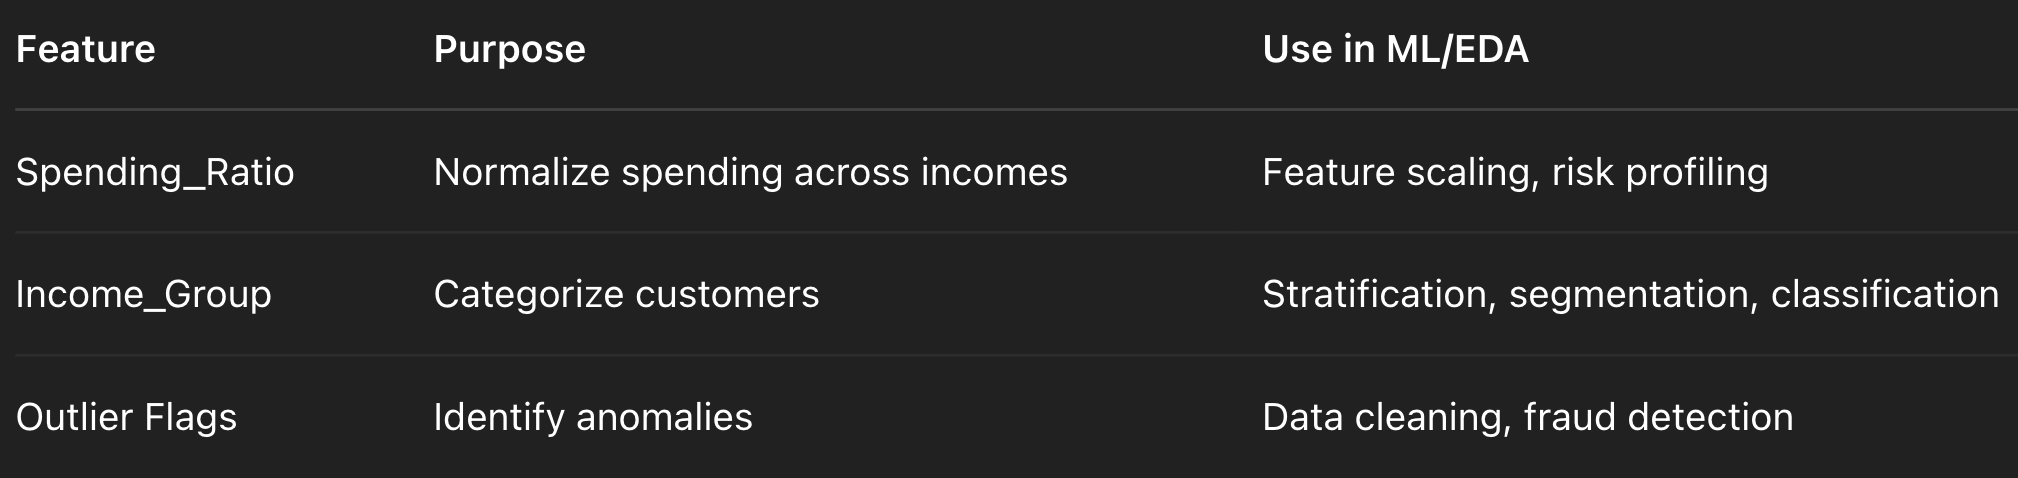



---



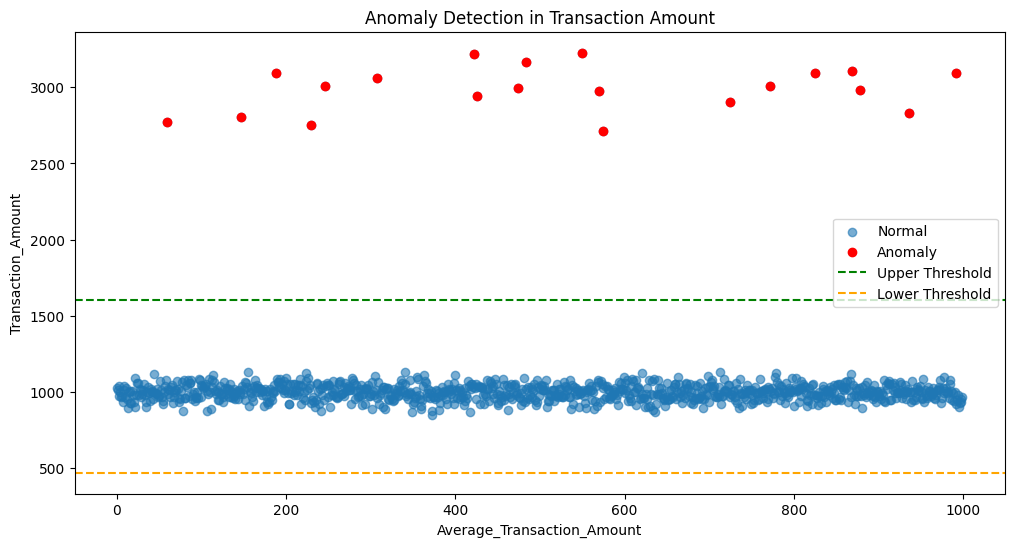

In [42]:
# visualizing anomalies helps you to spot outliers and understand their distribution.
# Calculates the mean and standard deviation of Transaction_Amount
# flags anomalies based on standard deviation threshold
# visualize them using a scatter plot



# 1 calculate mean and standard deviation
mean_amount = df['Transaction_Amount'].mean()
std_amount  = df['Transaction_Amount'].std()

# 2 - define anomaly threshold
threshold_upper = mean_amount + 2 * std_amount
threshold_lower = mean_amount - 2 * std_amount

# 3 - flag the anomalies
df['Anomaly'] = (df['Transaction_Amount'] > threshold_upper) | (df['Transaction_Amount'] < threshold_lower)

# 4 - scatter plot by highlighting anomalies
plt.figure(figsize=(12,6))
plt.scatter(df.index, df['Transaction_Amount'], label='Normal', alpha=0.6)
plt.scatter(df[df['Anomaly']].index, df[df['Anomaly']]['Transaction_Amount'], color='red', label='Anomaly')
plt.axhline(threshold_upper, color='green', linestyle='--', label='Upper Threshold')
plt.axhline(threshold_lower, color='orange', linestyle='--', label='Lower Threshold')
plt.title('Anomaly Detection in Transaction Amount')
plt.xlabel('Average_Transaction_Amount')
plt.ylabel('Transaction_Amount')
plt.legend()
plt.show()


In [44]:
# number of anomalies
num_anomalies = df['Anomaly'].sum()

# total number of instances
total_instances = len(df)

# ratio of anomalies
anomaly_ratio = num_anomalies / total_instances


print(f'number of anomalies - {num_anomalies}')
print(f'total instances - {total_instances}')
print(f'anomaly ratio - {anomaly_ratio:.3f}')


number of anomalies - 20
total instances - 1000
anomaly ratio - 0.020


In [45]:
df

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Anomaly
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,False
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,False
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,False
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,False
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,46,Female,424746,Savings,False
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,58,Female,908278,Current,False
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,58,Female,1353498,Current,False
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,58,Female,359072,Savings,False




---



In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# relevant features
relevant_features = ['Transaction_Amount', 'Income', 'Transaction_Volume']
X = df[relevant_features]
y = df['Anomaly'].astype(int)


#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# training Unsupervised Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)
isolation_forest.fit(X_train)

IsolationForest(random_state=42)

In [48]:
# prediction on test set
y_pred = isolation_forest.predict(X_test)

In [49]:
# converting predictions to binary (1 - anomaly, 0 - normal)

y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred] # Isolation Forest model returns: -1 for anomaly, 1 for normal

In [51]:
# evaluating models performance

report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      0.61      0.76       294
     Anomaly       0.05      1.00      0.09         6

    accuracy                           0.62       300
   macro avg       0.52      0.80      0.43       300
weighted avg       0.98      0.62      0.74       300



Normal transaction (Label: 0) --

1. Precision = 1.00
Out of all instances predicted as Normal, 100% were actually Normal.

2. Recall = 0.61
Out of all actual Normal instances, only 61% were correctly identified.

3. F1-score = 0.76
it is harmonic mean of precision and recall, shows overall performance for this class.

4. Support = 294
there were 294 actual normal instances in the test set.

Anomaly transaction (Label: 1)

1. Precision = 0.05
Out of all predicted anomalies, only 5% were truly anomalies. (Very high false positives)

2. Recall = 1.00
model successfully detected all actual anomalies (100% recall).

3. F1-score = 0.09
low overall performance due to poor precision.

4. Support = 6
Only 6 anomalies were in the test set (imbalanced dataset).

Precision - proportion of predicted anomalies (or normal points) that are actually correct.

Precision=  TP / (TP+FP)

Recall - proportion of actual anomalies that were correctly identified by the model.

recall = TP / (TP+FN)

F1-Score - harmonic mean of precision and recall, to balance precision and recall.

F1 score = 2(PR) / (P+R)  -- P-Precision, R-Recall



---



In [54]:
conf_matrix= confusion_matrix(y_test, y_pred_binary)
conf_matrix

array([[179, 115],
       [  0,   6]])

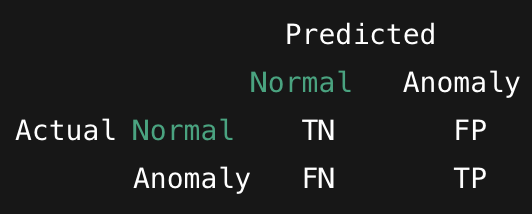

binary confusion matrix

1. TN (True Negatives): The number of normal instances correctly predicted as normal.

2. FP (False Positives): The number of normal instances incorrectly flagged as anomalies.

3. FN (False Negatives): The number of anomaly instances incorrectly classified as normal.

4. TP (True Positives): The number of anomaly instances correctly predicted as anomalies.



we are having high number of False Positives, i.e model overreacts to slight deviations in normal behavior and model is sensitive, flagging outliers that are not actually an anomaly.

so too many false alarms can trigger unnecessary actions and it may cause users to lose trust in the system.





---



In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
# relevant features
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']
X = df[relevant_features]
y = df['Anomaly'].astype(int)


#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# training Unsupervised Isolation Forest model
model_2 = IsolationForest(contamination=0.02, random_state=42)
model_2.fit(X_train)
# contamination parameter of 0.02 (indicating the expected ratio of anomalies) and a random_state for reproducibility.

IsolationForest(contamination=0.02, random_state=42)

In [57]:
# prediction on test set
y_pred = model_2.predict(X_test)

In [58]:
# converting predictions to binary (1 - anomaly, 0 - normal)

y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred] # Isolation Forest model returns: -1 for anomaly, 1 for normal

In [59]:
# evaluating models performance

report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [60]:
conf_matrix= confusion_matrix(y_test, y_pred_binary)
conf_matrix

array([[196,   0],
       [  0,   4]])

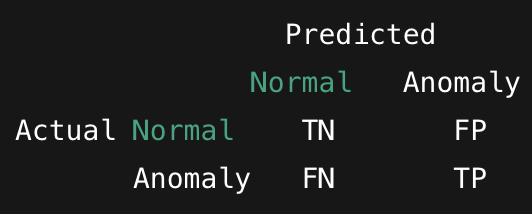

1. high number of TN and TP means that your model is doing well.

2. FP and FN are errors. In anomaly detection -

  1. False Positives (Type I error) - normal points marked as anomalies.

  2. False Negatives (Type II error) - actual anomalies missed by the model.

By reducing False Positives analysts can focus on real threats, lower their operational expenses and higher customer satisfaction & retention..

In [62]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model_2 -- optimized model
user_anomaly_pred = model_2.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print('Anomaly detected -- This transaction is flagged as an anomaly..')
else:
    print('No anomaly detected -- This transaction is normal..')

Enter the value for 'Transaction_Amount': 12000
Enter the value for 'Average_Transaction_Amount': 1500
Enter the value for 'Frequency_of_Transactions': 10
Anomaly detected -- This transaction is flagged as an anomaly..




---



# **STREAMLIT DASHBOARD**

In [66]:
!pip install streamlit pyngrok --quiet

In [67]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load dataset
@st.cache_data
def load_data():
    df = pd.read_csv("/content/transactions_dataset.csv")  # Replace with your file name or upload path
    return df

df = load_data()

st.set_page_config(page_title="Transaction Anomaly Detection", layout="wide")
st.title("🚨 Transaction Anomaly Detection Dashboard")

# Sidebar
st.sidebar.header("Filters")
age_range = st.sidebar.slider("Select Age Range", int(df["Age"].min()), int(df["Age"].max()), (20, 60))
income_filter = st.sidebar.selectbox("Select Income Tier", ["All", "Low", "Medium", "High"])

# Apply filters
filtered_df = df[(df["Age"] >= age_range[0]) & (df["Age"] <= age_range[1])]
if income_filter != "All":
    filtered_df = filtered_df[filtered_df["Income_Tier"] == income_filter]

# Isolation Forest Model
model = IsolationForest(contamination=0.02, random_state=42)
features = filtered_df[["Transaction_Amount", "Income", "Transaction_Volume"]]
filtered_df["Anomaly"] = model.fit_predict(features)
filtered_df["Anomaly"] = filtered_df["Anomaly"].map({1: 0, -1: 1})

# Anomaly Plot
st.subheader("📊 Transaction Amount vs Age")
fig, ax = plt.subplots()
sns.scatterplot(data=filtered_df, x="Age", y="Transaction_Amount", hue="Anomaly", palette={0: "blue", 1: "red"}, ax=ax)
st.pyplot(fig)

# Stats
st.subheader("📋 Anomaly Summary")
total = len(filtered_df)
anomalies = filtered_df["Anomaly"].sum()
st.write(f"Total Transactions: {total}")
st.write(f"Anomalies Detected: {anomalies}")
st.write(f"Anomaly Ratio: {anomalies / total:.2%}")

# Anomaly Table
st.subheader("🔍 Anomalous Transactions")
st.dataframe(filtered_df[filtered_df["Anomaly"] == 1])

# Export
st.download_button("Download Anomalies as CSV", filtered_df[filtered_df["Anomaly"] == 1].to_csv(index=False), "anomalies.csv")


Writing app.py


In [68]:
from google.colab import files
uploaded = files.upload()


Saving transactions_dataset.csv to transactions_dataset (1).csv


In [76]:
# Reinstall to be safe
!pip install streamlit pyngrok --quiet
!rm -rf ~/.ngrok2/ngrok.yml


In [77]:
!ngrok config add-authtoken YOUR_TOKEN


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [78]:
from pyngrok import ngrok
import time

# Run the Streamlit app in the background
!streamlit run app.py &>/content/logs.txt &

# Wait a moment for the server to start
time.sleep(5)

# Open a tunnel (correct way)
public_url = ngrok.connect(8501, "http")
print("✅ Streamlit is running at:", public_url)


✅ Streamlit is running at: NgrokTunnel: "https://5db7-35-229-43-137.ngrok-free.app" -> "http://localhost:8501"
